**예측값** 을 종속변수 Dependent variables 또는 출력변수 Output variables 라고함
**영향변수**을 독립변수 Input variables 또는 입력변수 Input variables 라고함 

### OLS 계산
회귀모델을 구하는 메서드

In [1]:
import numpy as np
ad
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])


Bad key "text.kerning_factor" on line 4 in
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


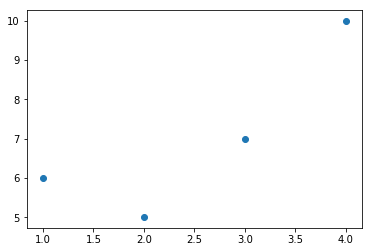

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111) #1행 1열 첫번째
ax.scatter(x,y)

## 선형회귀식으로 풀고 오류를 최소화해보자

* 선형회귀식으로 y^ 값 구하기
* y* 값과 y 값의 차이 의 제곱 = 오류
* 편미분을 해서 0이 되는 가장 최소 w값 구하기

-> 직접 풀어서 1.4와 3.5 도출 

#### 1. 직접 연산

In [3]:
yhat=x*1.4+3.5

In [4]:
f"predicted: {yhat}"

'predicted: [4.9 6.3 7.7 9.1]'

In [5]:
f"predicted - actual: {yhat-y}"

'predicted - actual: [-1.1  1.3  0.7 -0.9]'

In [6]:
# 오류는 플러스, 마이너스 서로 상쇄될수 있다. 오류의 제곱(RSS)로 구하기
f"error: {np.sum(np.power(yhat-y,2))}"

'error: 4.199999999999998'

#### 2. 파이썬을 이용한 계산

In [7]:
#SymPy는 수식이나 논리 명제를 풀기 위해 만들어진 파이썬 라이브러리
import sympy as sp

#변수 b0, b1
b0,b1=sp.symbols('b0 b1')

f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1

fdiff_b0=sp.diff(f,b0) #b0에 대해서 편미분
fdiff_b1=sp.diff(f,b1) #b1에 대해서 편미분

#sp.solve 편미분한 값을 0으로 두고 푸는 기능
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])

In [8]:
print ("fdiff with b0: {}\nfdiff with b1: {}".format(fdiff_b0, fdiff_b1))

fdiff with b0: 8*b0 + 20*b1 - 56
fdiff with b1: 20*b0 + 60*b1 - 154


In [9]:
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


In [10]:
import numpy as np

x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

In [11]:
A=np.array([x, np.ones(9)])
print (A)

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [12]:
# 열을 읽을 경우
A[0,:]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [13]:
# 행을 읽을 경우
A[:,1]

array([1., 1.])

$x_{02}$ 또는 $x_{0}^{2}$는 1번째 행(레코드), 3번째 컬럼(속성) A[0,2]

In [14]:
A[0,2]

2.0

#### 3. numpy listsq
numpy의 listsq()를 사용해서 데이터 회귀식의 계수 w0, w1를 계산 <br>
np.linalg.lstsq(A.T, y, rcond=None)<br>
- rcond는 행렬 A의 특잇값 singular value의 cut-off 비율, 기본값을 적용하지 않겠다는 의미이다.

In [15]:
w0, w1=np.linalg.lstsq(A.T, y, rcond=None)[0]
#weight 값과 잔여오류값 반환// weight 값만 얻기 위해서 [0]

#A값은 [[0. 1. 2. 3. 4. 5. 6. 7. 8.]
#      [1. 1. 1. 1. 1. 1. 1. 1. 1.]]

#A.T 를 통해서 속성 2개 값 9개가 만들어짐

In [16]:
print ("w0: {}\nw1: {}".format(w0, w1))

w0: 0.7166666666666672
w1: 19.188888888888897


In [17]:
yhat=w0*x+w1

In [18]:
print ("예측: {}".format(yhat))

예측: [19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


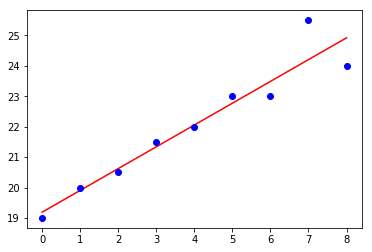

In [19]:
#시각화

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

##  $R^2$
 $R^2$은 종속변수의 분산을 독리변수로 얼마나 예측할 수 있는지
 - 총 오류TSS = 오류SSE + 잔여오류RSS
 (잔여오류RSS를 TSS총오류로 나누어 계산)
 
 $r^2=\frac{RSS}{TSS}$

 
- 총오류 TSS (Total Sum of Squared Errors)
- 오류의 합계 SSE (Sum of Squared Errors)
- 잔여 오류 RSS (Residual Sum of Squared Errors)

**RSS를 최소로 만들어주는 W0 W1 구하는 방식이 OLS method 라고함**

**R squared 계산**
총오류와 잔여 오류를 계산

#### 1. 직접계산 ($R^2$, adjusted $R^2$)

In [20]:
RSS = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)

v=np.linalg.lstsq(A.T, y, rcond=None)[1] #RSS 값과 동일
print(RSS, TSS, v)

2.90555555555555 33.72222222222222 [2.90555556]


In [21]:
value=np.linalg.lstsq(A.T, y, rcond=None)[:] 
value
#weight, RSS, ??, ??

(array([ 0.71666667, 19.18888889]),
 array([2.90555556]),
 2,
 array([14.50633907,  1.60191348]))

In [22]:
r_squared = 1 - (float(RSS))/TSS
f"r_squared: {r_squared}"

'r_squared: 0.9138385502471171'

adjusted R-squared는 독립변수의 개수에 따라 과도한 $R^2$를 수정한 값이다.

$R^2\space adjusted=1 - \frac{(1-R^2)(n-1)}{n-k-1}$

- n은 데이터 개수
- k는 독립변수 개수

In [23]:
#### 보정!! 
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.902 without -1
f"adjusted_r_squared: {adjusted_r_squared}"

'adjusted_r_squared: 0.8851180669961561'

### statsmodels R squared 
#### 2. statsmodels 를 사용해서 회귀분석과 $R^2$

In [24]:
import statsmodels.api as sm

result = sm.OLS(y, A.T).fit()

In [25]:
result.summary()
#warning 데이터 값이 적어서

C:\Users\woojung\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           5.66e-05
Time:                        09:00:59   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.000       0.520       0.913
const         19.1889      0.396     48.458      0.000      18.253      20.125
==============================================================================
Omnibus:                        4.624   Durbin-Watson:                   3.078
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.154
Skew:                           0.773   Prob(JB):                        0.561
Kurtosis:                       3.830   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
result.rsquared, result.rsquared_adj
# 0.877643371323 0.863248473832

(0.9138385502471168, 0.9015297717109907)

### matrix inverse method

- w 푸는 법: 오류 e는 잔차를 제곱해서 더한 합게 sum of squared residuals 임

$f = e.T \times e = (y-wx)^T (y-wx) = y^Ty - 2w(x^Ty)^T+w^Tx^Twx$

위를 미분하면 $\frac{\partial f}{\partial w} = 0 -2(x^Ty)+2wx^Tx$

위 미분 값을 0으로 놓고 풀면, $-2x^Ty + 2\hat{w}x^Tx = 0$

위 식을 정리하면 $\hat{w} = (X^T X) ^{-1} X^T y$

In [27]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]
f"x: {x} y: {y}"

'x: [[2, -4], [3, 6]] y: [8, 9]'

In [28]:
# set_printoptions(precision = 2, suppress = True) # 출력 자릿수를 2자리로 제한

np.set_printoptions(precision=2, suppress=True)

In [29]:
#X의 inverse 값 구하기
xI = np.linalg.inv(x) 
print("x inv:\n{}".format(xI))

x inv:
[[ 0.25  0.17]
 [-0.12  0.08]]


In [30]:
# X 와 X의 inverse 값 내적하면 1
print ("identity matrix 'x * xI':\n{}".format(np.dot(x,xI)))

identity matrix 'x * xI':
[[1. 0.]
 [0. 1.]]


In [31]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

위 식을 행렬로 나타내면, $\beta \times x = y$

$x^{-1}\times x\times \beta=x^{-1}\times y$

$x^{-1}\times x=1$

$\beta=x^{-1}\times y$

In [32]:
np.array()는 np.linalg.inv(), np.mat()는 x.I로 inverse를 계산한다.

In [33]:
# matrix inverse
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)

print ("v=\n{0}\nv.I=\n{1}".format(v,vI)) #([[-2.5, 1.5], [ 2. , -1. ]])

v=
[[2 3]
 [4 5]]
v.I=
[[-2.5  1.5]
 [ 2.  -1. ]]


 $\frac{1}{ad-bc} \begin{pmatrix}d  -b\\-c    a\end{pmatrix}$

In [34]:
# 직접 식으로 계산
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
f"{left*right}" #([-2.5,  1.5,  2. , -1. ])

'[-2.5  1.5  2.  -1. ]'

### 1. Matrix 을 통해 W 구하는 방법
x inverse(x의 역행렬 구하기) > xI와 y의 내적값

In [35]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

xI=np.linalg.inv(x)

w1,w2=np.dot(xI,y)
print(w1,w2)

3.5 -0.25


In [36]:
f"{2*w1+(-4)*w2}"

f"{3*w1+6*w2}"

'9.0'

### 2. numpy solve
numpy.linalg.solve()는 선형 벡터 식을 풀 수 있다

위의 x,y를 넣으면 값을 구할 수 있다.

In [37]:
np.linalg.solve(x,y)

array([ 3.5 , -0.25])

### TEST

In [38]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [39]:
##1차원 inverse 해주는 법
#x=np.array([1,2,3,4])
#x[:, np.newaxis]

In [40]:
x=np.array([x, np.ones(len(x))])
x=x.T
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


In [41]:
f"x shape: {x.shape} xT shape:{x.T.shape}"

'x shape: (4, 2) xT shape:(2, 4)'

In [42]:
np.dot(x,x.T)

array([[ 2.,  3.,  4.,  5.],
       [ 3.,  5.,  7.,  9.],
       [ 4.,  7., 10., 13.],
       [ 5.,  9., 13., 17.]])

In [43]:
np.linalg.inv(np.dot(x,x.T)) #x와 x.T는 크기상 내적 불가능

LinAlgError: Singular matrix

In [44]:
xTx=np.dot(x.T,x)
print("xTx=",xTx)

xTx= [[30. 10.]
 [10.  4.]]


In [45]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

xTxI= [[ 0.2 -0.5]
 [-0.5  1.5]]


In [46]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

xTyT= [77. 28.]


In [47]:
print("weights=",np.dot(xTxI,xTyT))

weights= [1.4 3.5]


In [48]:
## 내적시 순서 신경써야한다
## 한줄로 계산


w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

In [49]:
w0, w1

(3.499999999999993, 1.4000000000000021)

### Numpy 최소 자승법

In [50]:
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

numpy lstsq:  (array([1.4, 3.5]), array([4.2]), 2, array([5.78, 0.77]))


In [51]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

w1= 1.4000000000000006 
w0= 3.499999999999998


#### 정리

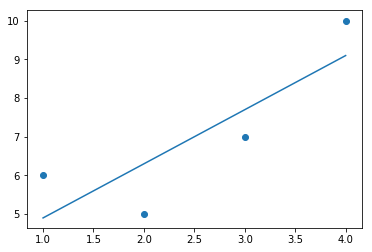

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T # shape (4,2)
#w1,w0=np.linalg.lstsq(_x,y)[0]
w1, w0=np.dot(np.linalg.inv(np.dot(_x.T, _x)), np.dot(_x.T, y)) #1.4 3.5
yhat=w0+w1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

## Gradient Descent
- 탐욕적인 알고리즘
- local optimum 이 곧 global optimum임
- OLS방법을 보편적으로 사용

### 회귀식
$h_{\theta}(x)= \theta_{0} + \sum_{i=1}^n(\theta^Tx)$ ($x_0=1$)

### 오류
**MSE Mean Squared Error** <br>
$J(\theta) = \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2$

### 경사도 계산
gradient는 그 점에서의 기울기로서 방향, 크기를 나타낸다. 벡터의 gradient는 '각 변수에 대한 편미분 벡터'이다.

$\nabla f(x,y)= \frac{\partial{f}}{\partial{x}},
                  \frac{\partial{f}}{\partial{y}}$

$\alpha$는 학습율


$
\begin{align}
\frac{\partial}{\partial{\theta_j}}J(\theta)
    =\frac{\partial}{\partial{\theta_j}} \frac{1}{n} (h_{\theta}(x) - y)^2\\
    =2 \cdot \frac{1}{n} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (h_{\theta}(x) - y)\\
    =\frac{2}{n}\cdot (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (\sum_{i=0}^n \theta_i x_i - y)\\
    =\frac{2}{n}\cdot (h_{\theta}(x) - y) x_j
\end{align}
$

### 갱신
$\theta_j := \theta_j - \alpha\frac{2}{n}(h_\theta(x)-y)x_{j})$

### 상수항을 넣어서 계산
$J(\theta)$ $MSE =\frac{1}{n} \sum_{i=1}^n((ax_i+b) - y_i)^2$

오류를 편미분해서 기울기 gradient를 a,b에 대해 구한다
- $\frac{\partial}{\partial{a}}
  =\frac{2}{n} \sum_{i=1}^n((ax_i+b) - y_i) (x_i)$
- $\frac{\partial}{\partial{b}}
  =\frac{2}{n} \sum_{i=1}^n((ax_i+b) - y_i) (1)$

### 알고리즘
모든 계수 $\theta = 1$ (또는 무작위), $\alpha$ 설정
반복
- $\theta$ 갱신
- $\theta_j := \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)$

In [7]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [8]:
#상수항 1을 넣어줌
x=np.array([x, np.ones(len(x))])

In [9]:
x=x.T

In [10]:
x, x.shape

(array([[1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.]]),
 (4, 2))

In [11]:
#학습률
alpha = 0.01

In [26]:
#weight 초기화 𝜃1, 𝜃0두개 설정
theta=np.array(np.ones([x.shape[1]]))

In [27]:
theta

array([1., 1.])

h(x)는 $x_1 \times \theta_{1} + x_0 \times \theta_{0}$으로 계산

In [30]:
x*theta #이건 요소별로 곱해진다 -> 이러면 h(x)값을 도출 안됨

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

In [32]:
#h(x)의 값을 내옴
def h(x, theta):
    return np.dot(x, theta)

h(x,theta)

array([2., 3., 4., 5.])

In [20]:
error=h(x,theta)-y

In [33]:
f"simple error y-h: {error}"

'simple error y-h: [-4. -2. -3. -5.]'

#### gradient 값 계산

In [23]:
np.sum(h(x,theta)-y)*(2)/len(x)

-7.0

In [34]:
np.sum(x.T*(h(x,theta)-y), axis=1)*(2)/len(x)

array([-18.5,  -7. ])

In [38]:
#$x_0$은 1이므로 위는 np.dot(x.T,error)로 바꿔쓸 수 있다.
gradient=np.dot(x.T,error)*(2)/len(x)
f"gradient: {gradient}"

'gradient: [-18.5  -7. ]'

#### 갱신

In [40]:
theta -= alpha*gradient
f"theta: {theta}"

'theta: [1.37 1.14]'

### 함수로 만들기

In [41]:
x

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

In [42]:
y

array([ 6,  5,  7, 10])

In [43]:
theta=np.array(np.ones([x.shape[1]]))

In [138]:
## 함수로 만들기 iteration을 위함
def gradientDescent(x, y, theta, alpha, numIteration):
    #alpha = 0.01
    #cost = np.inf
    for i in range(numIteration):
        h = np.dot(x, theta)
        error  = h-y
        cost = np.sum((h-y)**2)/ len(x) #full MSE
        gradient = np.dot(x.T, error) *2/len(x) #w0, w1
        theta -= alpha * gradient
        if i % 100 ==0:
            print("Iteration {0} | theta {1} Cost {2:5f}".format(i, theta, cost))
    return theta

In [139]:
gradientDescent(x, y, theta, alpha, 10000)

Iteration 0 | theta [1.88730629 0.51642947] Cost 122.898854
Iteration 100 | theta [1.88733864 0.51422644] Cost 122.898369
Iteration 200 | theta [1.88737099 0.51202344] Cost 122.897883
Iteration 300 | theta [1.88740334 0.50982047] Cost 122.897398
Iteration 400 | theta [1.88743569 0.50761753] Cost 122.896913
Iteration 500 | theta [1.88746804 0.50541463] Cost 122.896427
Iteration 600 | theta [1.88750039 0.50321175] Cost 122.895942
Iteration 700 | theta [1.88753273 0.5010089 ] Cost 122.895456
Iteration 800 | theta [1.88756508 0.49880609] Cost 122.894971
Iteration 900 | theta [1.88759743 0.49660331] Cost 122.894486
Iteration 1000 | theta [1.88762977 0.49440055] Cost 122.894000
Iteration 1100 | theta [1.88766212 0.49219783] Cost 122.893515
Iteration 1200 | theta [1.88769446 0.48999514] Cost 122.893030
Iteration 1300 | theta [1.88772681 0.48779248] Cost 122.892545
Iteration 1400 | theta [1.88775915 0.48558986] Cost 122.892059
Iteration 1500 | theta [1.88779149 0.48338726] Cost 122.891574
Iter

array([1.8905387 , 0.29630169])

### numpy가 아닌 list로 풀기

In [100]:
import random
def computeAvgError(a,b, x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a+ b * x[i])) **2
    return totalError /float(len(x))

def gradientDescentL(x,y, alpha, iter):
    a = random.random()
    b = random.random()
    n = len(x)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            aGradient += (2./n) * (((a+b * x[i]))-y[i]) *(1)#bias값의 그레이디언트
            bGradient += (2./n) * (((a+b * x[i]))-y[i]) *(x[i]) #x값의 그레이디언트     
        a = a -(alpha * aGradient)
        b = b -(alpha * bGradient)
        if (j % 100 ==0):
            print("iter: {0} a = {1:.3f} b={2:.3f} AvgError={3:3f}".format(j,a,b,computeAvgError(a,b,x,y)))
    return a,b

In [101]:
x=[1,2,3,4]
y=[6,5,7,10]

In [102]:
alpha = 0.01
a,b=gradientDescentL(x,y,alpha,5000)

iter: 0 a = 0.119 b=1.026 AvgError=19.846369
iter: 100 a = 1.339 b=2.135 AvgError=1.829741
iter: 200 a = 1.899 b=1.945 AvgError=1.478069
iter: 300 a = 2.314 b=1.803 AvgError=1.285005
iter: 400 a = 2.621 b=1.699 AvgError=1.179015
iter: 500 a = 2.849 b=1.621 AvgError=1.120828
iter: 600 a = 3.017 b=1.564 AvgError=1.088883
iter: 700 a = 3.142 b=1.522 AvgError=1.071347
iter: 800 a = 3.235 b=1.490 AvgError=1.061719
iter: 900 a = 3.304 b=1.467 AvgError=1.056434
iter: 1000 a = 3.355 b=1.449 AvgError=1.053532
iter: 1100 a = 3.392 b=1.437 AvgError=1.051939
iter: 1200 a = 3.420 b=1.427 AvgError=1.051064
iter: 1300 a = 3.441 b=1.420 AvgError=1.050584
iter: 1400 a = 3.456 b=1.415 AvgError=1.050321
iter: 1500 a = 3.468 b=1.411 AvgError=1.050176
iter: 1600 a = 3.476 b=1.408 AvgError=1.050097
iter: 1700 a = 3.482 b=1.406 AvgError=1.050053
iter: 1800 a = 3.487 b=1.404 AvgError=1.050029
iter: 1900 a = 3.490 b=1.403 AvgError=1.050016
iter: 2000 a = 3.493 b=1.402 AvgError=1.050009
iter: 2100 a = 3.495 b=1

In [103]:
print("---> a={0}, b={1} after iterations".format(a,b))

---> a=3.499999098027361, b=1.4000003067806897 after iterations


In [104]:
#예측
yhat=list()
for i in range(len(x)):
    yhat.append(a + b*x[i])
    
yhat

[4.899999404808051, 6.2999997115887405, 7.70000001836943, 9.10000032515012]

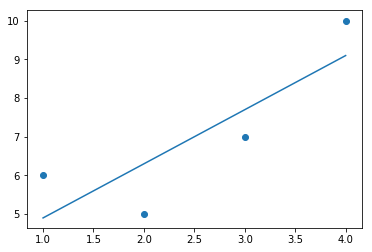

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x,yhat)
plt.show()

## 문제: 키 몸무게를 matrix inverse method와 gradient descent 로 풀기

### 1. list 사용 (행렬) :matrix inverse

In [106]:
import os

file=open(os.path.join('data','ds_spark_heightweight.txt'))

In [107]:
import numpy as np
my=list()
for line in file:
    line=line.split()
    my.append([float(line[1]),float(line[2])])
my=np.array(my)

In [108]:
x=my[:,0]
y=my[:,1]

In [109]:
len(x)

50

In [110]:
x=np.array([x,np.ones(len(x))])
x=x.T

In [111]:
x, x.shape

(array([[65.78,  1.  ],
        [71.52,  1.  ],
        [69.4 ,  1.  ],
        [68.22,  1.  ],
        [67.79,  1.  ],
        [68.7 ,  1.  ],
        [69.8 ,  1.  ],
        [70.01,  1.  ],
        [67.9 ,  1.  ],
        [66.78,  1.  ],
        [66.49,  1.  ],
        [67.62,  1.  ],
        [68.3 ,  1.  ],
        [67.12,  1.  ],
        [68.28,  1.  ],
        [71.09,  1.  ],
        [66.46,  1.  ],
        [68.65,  1.  ],
        [71.23,  1.  ],
        [67.13,  1.  ],
        [67.83,  1.  ],
        [68.88,  1.  ],
        [63.48,  1.  ],
        [68.42,  1.  ],
        [67.63,  1.  ],
        [67.21,  1.  ],
        [70.84,  1.  ],
        [67.49,  1.  ],
        [66.53,  1.  ],
        [65.44,  1.  ],
        [69.52,  1.  ],
        [65.81,  1.  ],
        [67.82,  1.  ],
        [70.6 ,  1.  ],
        [71.8 ,  1.  ],
        [69.21,  1.  ],
        [66.8 ,  1.  ],
        [67.66,  1.  ],
        [67.81,  1.  ],
        [64.05,  1.  ],
        [68.57,  1.  ],
        [65.18, 

In [112]:
y

array([112.99, 136.49, 153.03, 142.34, 144.3 , 123.3 , 141.49, 136.46,
       112.37, 120.67, 127.45, 114.14, 125.61, 122.46, 116.09, 140.  ,
       129.5 , 142.97, 137.9 , 124.04, 141.28, 143.54,  97.9 , 129.5 ,
       141.85, 129.72, 142.42, 131.55, 108.33, 113.89, 103.3 , 120.75,
       125.79, 136.22, 140.1 , 128.75, 141.8 , 121.23, 131.35, 106.71,
       124.36, 124.86, 139.67, 137.37, 106.45, 128.76, 145.68, 116.82,
       143.62, 134.93])

### w

In [113]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
print("w1:{} w0:{}".format(w1,w0))

w1:4.18697047973501 w0:-156.09138987513143


### yhat

In [114]:
yhat = w0*x[:,1] + w1*x[:,0]

### MSE

In [115]:
np.sum(np.power(y-yhat, 2))/len(x)

105.6444144864452

### 그래프

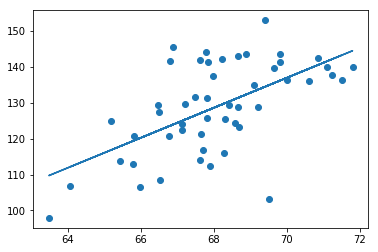

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],y)
plt.plot(x[:,0],yhat)
plt.show()

#### 2. Ststsmodels와 비교

In [117]:
import statsmodels.api as sm
result = sm.OLS(y,x).fit()

In [118]:
result.summary()

## x1 의 coef  -> w1의 값
## cost의 coef -> MSE 값

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     25.97
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           5.81e-06
Time:                        19:32:39   Log-Likelihood:                -187.45
No. Observations:                  50   AIC:                             378.9
Df Residuals:                      48   BIC:                             382.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1870      0.822      5.096      0.000       2.535       5.839
const       -156.0914     55.933     -2.791      0.008    -268.552     -43.631
==============================================================================
Omnibus:                        1.591   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.792
Skew:                          -0.193   Prob(JB):                        0.673
Kurtosis:                       3.481   Cond. No.                     2.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
result.rsquared, result.rsquared_adj

(0.3510824732436808, 0.33756335810292415)

### 3. gradient

In [120]:
x.shape, y.shape

((50, 2), (50,))

In [121]:
alpha = 0.0001
theta=np.array(np.ones([x.shape[1]]))

In [141]:
w1, w0=gradientDescent(x, y, theta, alpha, 10000)

Iteration 0 | theta [1.89086205 0.27428174] Cost 122.845538
Iteration 100 | theta [1.89089435 0.27208212] Cost 122.845054
Iteration 200 | theta [1.89092664 0.26988252] Cost 122.844570
Iteration 300 | theta [1.89095894 0.26768296] Cost 122.844086
Iteration 400 | theta [1.89099124 0.26548343] Cost 122.843602
Iteration 500 | theta [1.89102354 0.26328393] Cost 122.843118
Iteration 600 | theta [1.89105584 0.26108446] Cost 122.842634
Iteration 700 | theta [1.89108813 0.25888502] Cost 122.842150
Iteration 800 | theta [1.89112043 0.25668561] Cost 122.841667
Iteration 900 | theta [1.89115273 0.25448623] Cost 122.841183
Iteration 1000 | theta [1.89118502 0.25228689] Cost 122.840699
Iteration 1100 | theta [1.89121732 0.25008757] Cost 122.840215
Iteration 1200 | theta [1.89124961 0.24788829] Cost 122.839731
Iteration 1300 | theta [1.89128191 0.24568903] Cost 122.839248
Iteration 1400 | theta [1.8913142  0.24348981] Cost 122.838764
Iteration 1500 | theta [1.89134649 0.24129062] Cost 122.838280
Iter

In [142]:
# y_hat
yhatGV = w0*x[:,1] + w1*x[:,0]

In [143]:
# MSE
np.sum(np.power(y-yhatGV, 2))/len(x)

122.797211075061

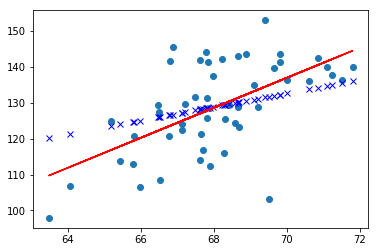

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],y)
plt.plot(x[:,0],yhatGV,'bx') # gradient, MSE=123
plt.plot(x[:,0],yhat,'r-') # matrix inverse, MSE=105.6
plt.show()

In [145]:
## python list로 gradient
x1=x[:,0]

In [146]:
x1

array([65.78, 71.52, 69.4 , 68.22, 67.79, 68.7 , 69.8 , 70.01, 67.9 ,
       66.78, 66.49, 67.62, 68.3 , 67.12, 68.28, 71.09, 66.46, 68.65,
       71.23, 67.13, 67.83, 68.88, 63.48, 68.42, 67.63, 67.21, 70.84,
       67.49, 66.53, 65.44, 69.52, 65.81, 67.82, 70.6 , 71.8 , 69.21,
       66.8 , 67.66, 67.81, 64.05, 68.57, 65.18, 69.66, 67.97, 65.98,
       68.67, 66.88, 67.7 , 69.82, 69.09])

In [147]:
a, b=gradientDescentL(x1,y,alpha,10000)

iter: 0 a = 0.991 b=1.812 AvgError=144.663403
iter: 100 a = 0.990 b=1.880 AvgError=123.003290
iter: 200 a = 0.987 b=1.880 AvgError=123.002802
iter: 300 a = 0.985 b=1.880 AvgError=123.002313
iter: 400 a = 0.983 b=1.880 AvgError=123.001825
iter: 500 a = 0.981 b=1.880 AvgError=123.001337
iter: 600 a = 0.979 b=1.881 AvgError=123.000848
iter: 700 a = 0.976 b=1.881 AvgError=123.000360
iter: 800 a = 0.974 b=1.881 AvgError=122.999872
iter: 900 a = 0.972 b=1.881 AvgError=122.999383
iter: 1000 a = 0.970 b=1.881 AvgError=122.998895
iter: 1100 a = 0.968 b=1.881 AvgError=122.998407
iter: 1200 a = 0.965 b=1.881 AvgError=122.997919
iter: 1300 a = 0.963 b=1.881 AvgError=122.997431
iter: 1400 a = 0.961 b=1.881 AvgError=122.996942
iter: 1500 a = 0.959 b=1.881 AvgError=122.996454
iter: 1600 a = 0.957 b=1.881 AvgError=122.995966
iter: 1700 a = 0.954 b=1.881 AvgError=122.995478
iter: 1800 a = 0.952 b=1.881 AvgError=122.994990
iter: 1900 a = 0.950 b=1.881 AvgError=122.994501
iter: 2000 a = 0.948 b=1.881 Avg

In [148]:
a,b

(0.771100106087588, 1.8835666536889153)

In [149]:

yhatGL=b*x1+a

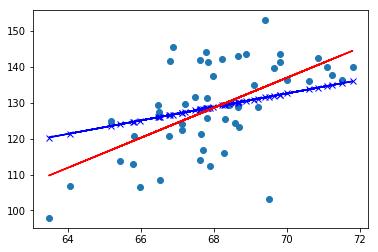

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x1,y)
plt.plot(x[:,0],yhatGL,'b-') # gradient with list, MSE=123
plt.plot(x[:,0],yhatGV,'bx') # gradient with vector, MSE=123
plt.plot(x[:,0],yhat,'r-') # matrix inverse, MSE=105.6
plt.show()

## 문제: 전복의 나이 sklearn 회귀분석

In [151]:
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

In [152]:
import pandas as pd

column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [153]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [154]:
#나이는 rings 에 1.5를 곱한다
abalone["age"] = 1.5 * abalone["rings"]

In [155]:
abalone.sample(n=5)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
1782,M,0.525,0.365,0.170,0.9605,0.4380,0.2225,0.2760,10,15.0
955,M,0.495,0.395,0.135,0.6335,0.3035,0.1295,0.1495,8,12.0
997,M,0.590,0.470,0.160,1.2060,0.4790,0.2425,0.3090,8,12.0
2909,F,0.580,0.450,0.150,0.9200,0.3930,0.2120,0.2895,9,13.5
267,M,0.350,0.275,0.110,0.2925,0.1225,0.0635,0.0905,8,12.0


In [157]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,14.900527
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,4.836254
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,12.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,13.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,16.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000


In [158]:
##height 값이 0 인 데이터 결측값이라고 치고 지워서 확인
abalone = abalone[abalone['height']>0]

In [160]:
abalone.describe() #count 값이 모자라게 됨

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,14.902635
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,4.836341
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,12.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,13.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,16.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000


### 변수간의 상관관계를 시각화함
#### pairplot
seaborn은 그 자체로는 그래프를 그릴 수 없다. matplotlib을 기반으로 하기 때문에 이를 import하고 plt.show() hue는 변수명을 선택하여 다른 색으로 그래프를 나타낸다. 이때 **diag_kind** (방식)를 ‘auto’, ‘hist’, ‘kde’ 가운데서 고르거나, 선택적 optional으로 정의하여 모양을 다르게 할 수 있다.

- 휘어져 있는 것들은 log을 통해 일직선으로 만들어줘야함
- 산포도가 넓은 애들은 이유가 뭔지 확인해주는것이 필요

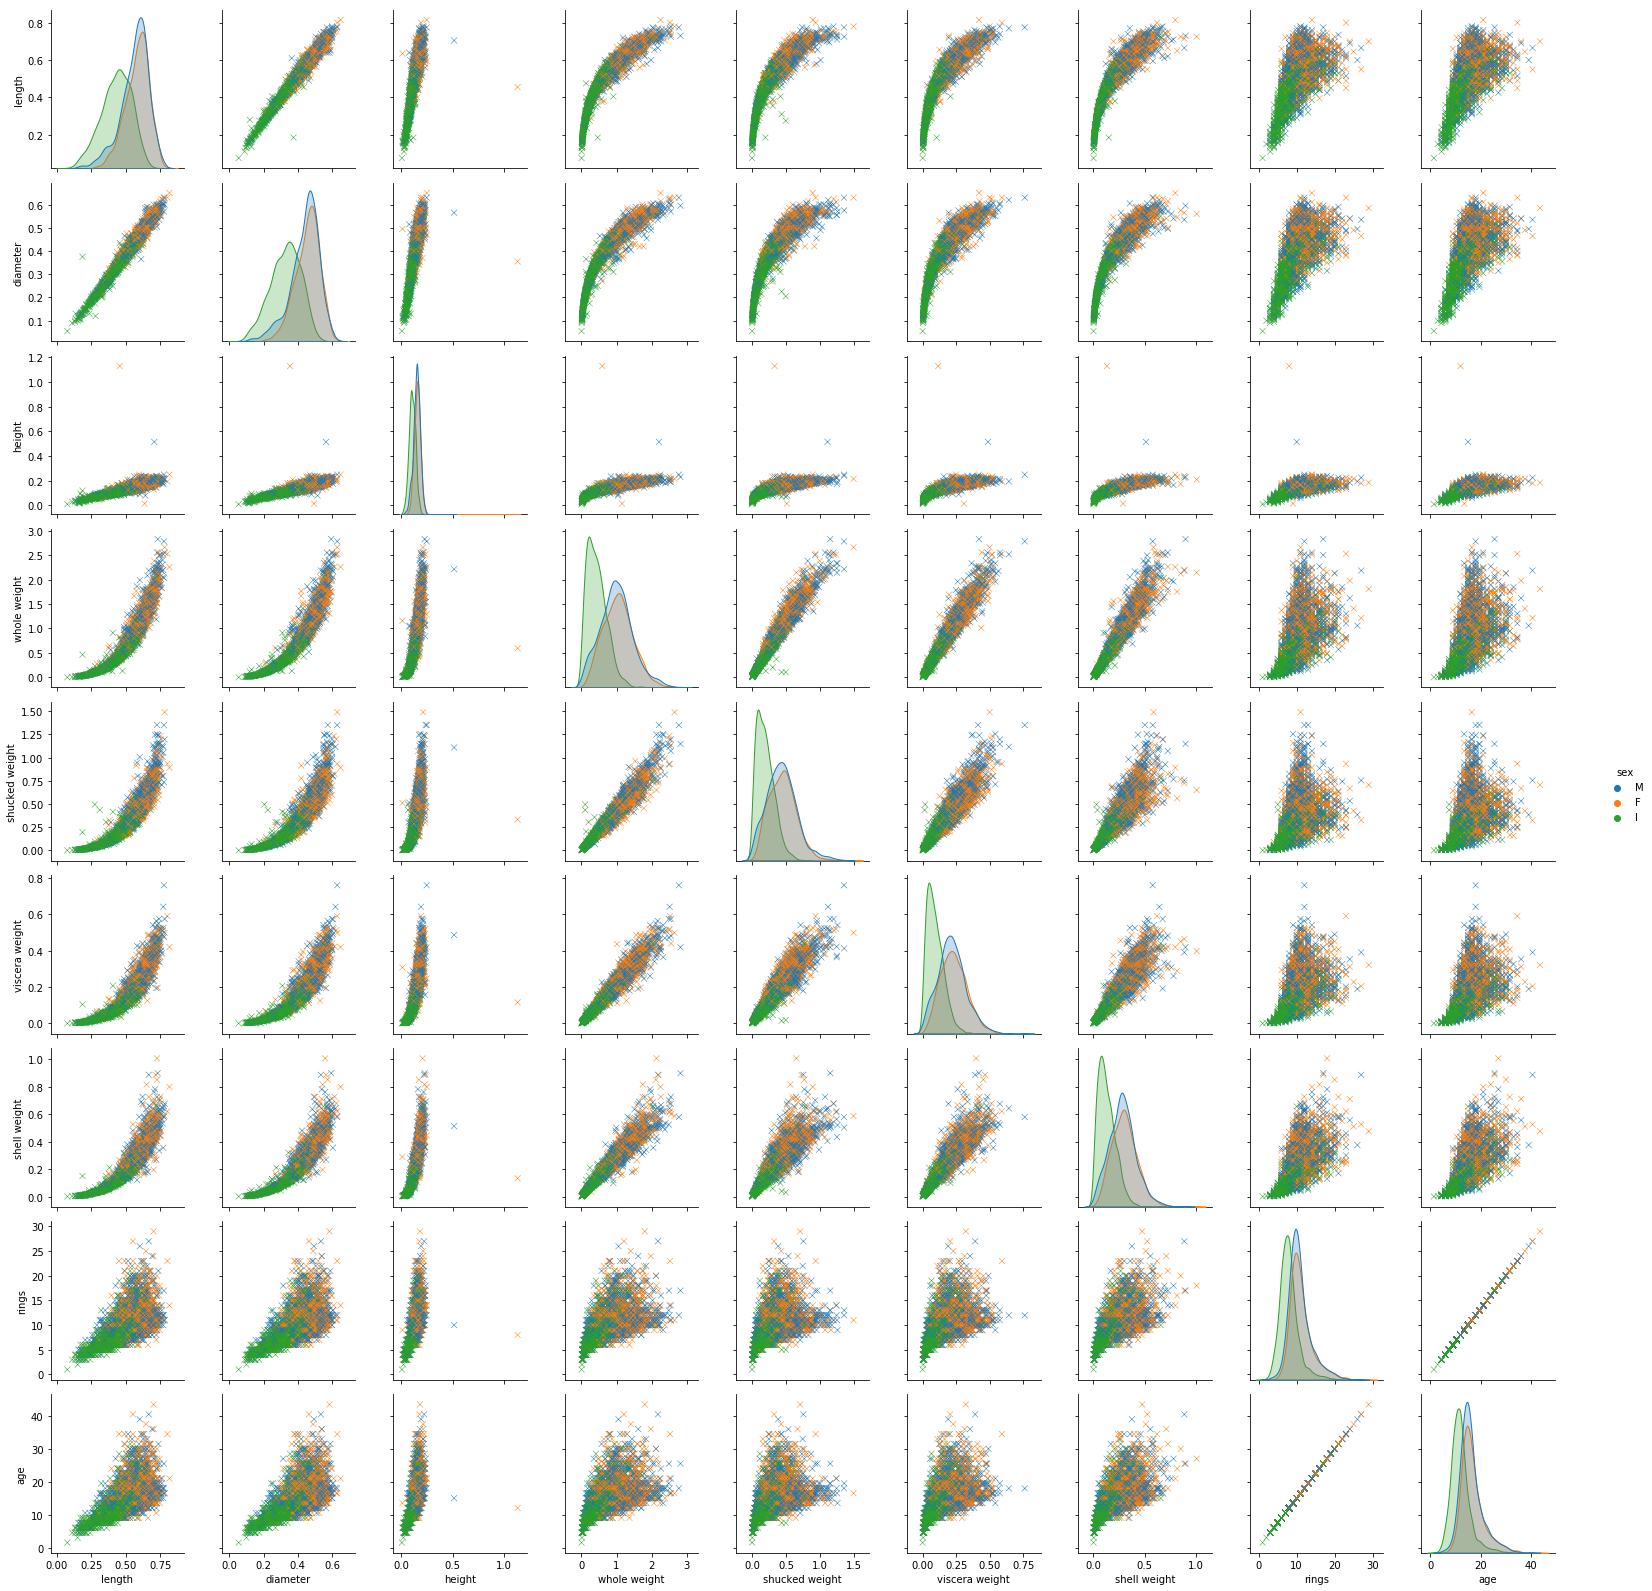

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind="kde")
#plt.show()

#### heatmap
heatmap은 상관관계의 강도에 따라 색을 다르게 나타내게 된다.
- correlation 확인

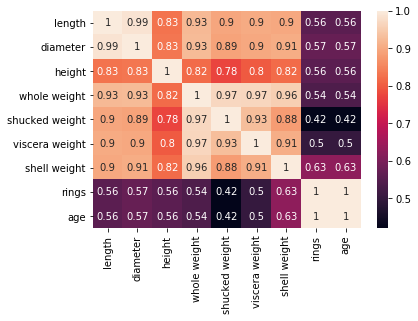

In [162]:
%matplotlib inline
corr = abalone.corr()
sns.heatmap(corr, annot=True)
#plt.show()

## Sklearn
- 회귀분석의 입력변수가 명목 변수가 있다면, 그대로 사용할 수 없음

In [164]:
# python으로 명목 변수 처리
abalone['Male'] = (abalone['sex']=='M').astype(int)
abalone['Female'] = (abalone['sex']=='F').astype(int)
abalone['Infant'] = (abalone['sex']=='I').astype(int)

In [165]:
#Sklean OneHotEncoding
## 명목변수의 가짓수에 따라 one-hot-encode 길이가 달라짐 ex) 3가지 : 2**3
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("sex", OneHotEncoder(handle_unknown='ignore'), [0])],
                       remainder = 'passthrough')
## 명목변수에 모르는 값이 존재할 경우 'ignore'하라는 의미, 명목변수가 아닌 다른 컬럼 remainder는 변환없이 그냥 통과 passthrough(default 'drop')
X = ct.fit_transform(abalone)

In [166]:
_abalone = pd.DataFrame(X)

In [167]:
_abalone.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.313054,0.320958,0.365988,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,14.902635,0.365988,0.313054,0.320958
std,0.463792,0.466901,0.481764,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,4.836341,0.481764,0.463792,0.466901
min,0.000000,0.000000,0.000000,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,12.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,13.500000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,16.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000,1.000000,1.000000,1.000000


In [168]:
##column이 값으로 변하기 때문에 그냥 Python으로 해주는게 나음
#### 본격 회귀분석하기 ####
##train, test split

In [169]:
#from sklearn.cross_validation import train_test_split # sklearn old version
from sklearn.model_selection import train_test_split

train, test = train_test_split(abalone, train_size=0.6)

In [170]:
from sklearn import linear_model

xtrain = train.drop(['age','rings','sex'],axis=1)
ytrain = train['age']
xtest = test.drop(['age','rings','sex'],axis=1)
ytest = test['age']

In [171]:
xtrain.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Male,Female,Infant
2697,0.660,0.515,0.165,1.4465,0.694,0.2980,0.3755,1,0,0
3862,0.475,0.370,0.125,0.6550,0.266,0.1725,0.1850,1,0,0
1547,0.380,0.290,0.100,0.2370,0.108,0.0395,0.0820,0,0,1
1031,0.650,0.495,0.160,1.3040,0.570,0.3120,0.3725,1,0,0
3079,0.700,0.555,0.220,1.6660,0.647,0.4285,0.4550,0,1,0


In [172]:
regression = linear_model.LinearRegression()
trainModel = regression.fit(xtrain, ytrain)

In [174]:
trainModel.intercept_ #절편구함

5.122730117215047

In [175]:
trainModel.coef_ #계수 구함 (Weight 구함)

array([ -1.6046879 ,  14.57627455,  28.92680138,  11.5617345 ,
       -27.047129  , -13.4723767 ,  13.42609611,   0.34256519,
         0.34897545,  -0.69154063])

In [177]:
#컬럼 명과 계수를 같이 보기
list(zip(xtrain.columns,regression.coef_))

[('length', -1.6046878979840835),
 ('diameter', 14.576274552649465),
 ('height', 28.926801382373707),
 ('whole weight', 11.561734500237247),
 ('shucked weight', -27.04712899579361),
 ('viscera weight', -13.4723767046514),
 ('shell weight', 13.426096107721635),
 ('Male', 0.3425651865036201),
 ('Female', 0.3489754458615919),
 ('Infant', -0.6915406323650597)]

##### 정확성
- xtest, ytest 적용

In [179]:
# Explained variance score: 1 is perfect prediction
accuracy = regression.score(xtest,ytest)
f"accuracy: {accuracy*100:.2f}%"

'accuracy: 51.87%'

In [180]:
ypred = regression.predict(xtest)

In [181]:
#_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})

In [182]:
y_actual_pred.head()

,Actual,Predicted
452,25.5,19.116493
2336,27.0,17.976245
3769,13.5,15.039911
1069,9.0,10.179913
2669,12.0,15.626216


In [183]:
import numpy as np

print("Mean Squared Error: %.2f" % np.mean((regression.predict(xtest) - ytest) ** 2))

Mean Squared Error: 11.75


In [184]:
from sklearn.metrics import r2_score

r2 = r2_score(ytest, ypred )
f"r2: {r2:.3f}"

'r2: 0.519'

C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


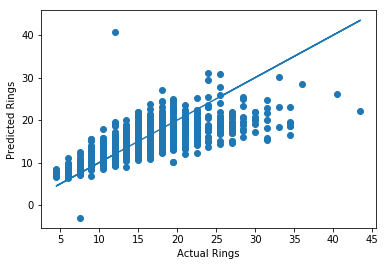

In [185]:
## 실제값과 예측값사이의 그래프 그리기

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest)

In [186]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [187]:
abalaoneDf=spark.createDataFrame(abalone)

In [188]:
abalaoneDf.printSchema()

root
 |-- sex: string (nullable = true)
 |-- length: double (nullable = true)
 |-- diameter: double (nullable = true)
 |-- height: double (nullable = true)
 |-- whole weight: double (nullable = true)
 |-- shucked weight: double (nullable = true)
 |-- viscera weight: double (nullable = true)
 |-- shell weight: double (nullable = true)
 |-- rings: long (nullable = true)
 |-- age: double (nullable = true)
 |-- Male: long (nullable = true)
 |-- Female: long (nullable = true)
 |-- Infant: long (nullable = true)



In [189]:
abalaoneDf.groupBy('sex').agg({"age":"avg"}).show()

+---+------------------+
|sex|          avg(age)|
+---+------------------+
|  F| 16.69395562356542|
|  M| 16.05824607329843|
|  I|11.837686567164178|
+---+------------------+



In [190]:
(trainDf, testDf) = abalaoneDf.randomSplit([0.6, 0.4])

In [191]:
trainDf.count()

2474

sex는 명목변수이고, 현재 string으로 설정되어 있어서, stringindexer를 거쳐 double타입으로 만들고, 그리고 onehotencoder로 vector로 변환한다.

In [192]:
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol="sex", outputCol="sexIndex") #문자열을 string

In [193]:
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder(inputCol="sexIndex", outputCol="sexVec")

In [194]:
##독립변수들을 묶어서 vector로 만들어야함
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols = ["sexVec", "length", "diameter", "height", "whole weight", 
                                            "shucked weight", "viscera weight", "shell weight"],
                                   outputCol = 'features')

In [195]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='age', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [196]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[stringIndexer, encoder, va, lr])

In [197]:
model = pipeline.fit(trainDf)
modelTrainDf = model.transform(trainDf)

In [198]:
print("Coefficients: {}".format(model.stages[-1].coefficients))
print("Intercept: {:.3f}".format(model.stages[-1].intercept))

Coefficients: [0.20746785555432495,0.4235473755741409,0.0,1.9988026977895261,39.3590956337662,0.0,-5.647412304158694,0.0,15.141419877420088]
Intercept: 6.845


In [200]:
modelTestDf=model.transform(testDf)


modelTestDf.select('age','prediction').show(10)

+----+------------------+
| age|        prediction|
+----+------------------+
| 7.5| 10.98505226397118|
| 9.0|10.791315369635715|
| 9.0| 11.33306424017751|
|13.5| 12.22169759336633|
|15.0|12.051225898518014|
|10.5|11.828328720942007|
|15.0|11.911318524747767|
| 7.5|11.706141512002267|
|12.0|11.501662862729507|
| 7.5|11.636336805552592|
+----+------------------+
only showing top 10 rows



In [201]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="age", predictionCol="prediction", metricName="rmse")

In [202]:
rmse=evaluator.evaluate(modelTestDf)

In [204]:
f"Root Mean Squared Error (RMSE) on test data: {rmse:.3f}"

'Root Mean Squared Error (RMSE) on test data: 3.561'

In [205]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="age", predictionCol="prediction", metricName="r2")

In [206]:

f"r2: {evaluator.evaluate(modelTestDf):.3f}"

'r2: 0.418'